In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [18]:
data = [
    {'Material Code': 'MAT_CHEMICAL_001', 'Location Partner': 3030, 'Exchange Partner': 250458, 'Container Serial Number': 115, 'Goods Issue': '02.06.2021', 'Goods Receipt': '12.06.2021', 'Retention Days': 10},
    {'Material Code': 'MAT_CHEMICAL_001', 'Location Partner': 3030, 'Exchange Partner': 250458, 'Container Serial Number': 116, 'Goods Issue': '02.06.2021', 'Goods Receipt': '14.06.2021', 'Retention Days': 12},
    {'Material Code': 'MAT_CHEMICAL_002', 'Location Partner': 1710, 'Exchange Partner': 400123, 'Container Serial Number': 120, 'Goods Issue': '04.06.2021', 'Goods Receipt': '10.06.2021', 'Retention Days': 6},
    {'Material Code': 'MAT_CHEMICAL_002', 'Location Partner': 1710, 'Exchange Partner': 400123, 'Container Serial Number': 121, 'Goods Issue': '04.06.2021', 'Goods Receipt': '11.06.2021', 'Retention Days': 7},
    {'Material Code': 'MAT_CHEMICAL_001', 'Location Partner': 3030, 'Exchange Partner': 340023, 'Container Serial Number': 7, 'Goods Issue': '06.06.2021', 'Goods Receipt': '?', 'Retention Days': '?'},
    {'Material Code': 'MAT_CHEMICAL_003', 'Location Partner': 4040, 'Exchange Partner': 500678, 'Container Serial Number': 115, 'Goods Issue': '08.06.2021', 'Goods Receipt': '15.06.2021', 'Retention Days': 7},
    {'Material Code': 'MAT_CHEMICAL_003', 'Location Partner': 4040, 'Exchange Partner': 500678, 'Container Serial Number': 116, 'Goods Issue': '08.06.2021', 'Goods Receipt': '16.06.2021', 'Retention Days': 8},
    {'Material Code': 'MAT_CHEMICAL_001', 'Location Partner': 3030, 'Exchange Partner': 250458, 'Container Serial Number': 117, 'Goods Issue': '09.06.2021', 'Goods Receipt': '12.06.2021', 'Retention Days': 3},
    {'Material Code': 'MAT_CHEMICAL_001', 'Location Partner': 3030, 'Exchange Partner': 250458, 'Container Serial Number': 118, 'Goods Issue': '09.06.2021', 'Goods Receipt': '14.06.2021', 'Retention Days': 5},
    {'Material Code': 'MAT_CHEMICAL_002', 'Location Partner': 1710, 'Exchange Partner': 400123, 'Container Serial Number': 122, 'Goods Issue': '10.06.2021', 'Goods Receipt': '12.06.2021', 'Retention Days': 2},
    {'Material Code': 'MAT_CHEMICAL_002', 'Location Partner': 1710, 'Exchange Partner': 400123, 'Container Serial Number': 123, 'Goods Issue': '10.06.2021', 'Goods Receipt': '14.06.2021', 'Retention Days': 4},
    {'Material Code': 'MAT_CHEMICAL_003', 'Location Partner': 4040, 'Exchange Partner': 500678, 'Container Serial Number': 117, 'Goods Issue': '11.06.2021', 'Goods Receipt': '17.06.2021', 'Retention Days': 6},
    {'Material Code': 'MAT_CHEMICAL_003', 'Location Partner': 4040, 'Exchange Partner': 500678, 'Container Serial Number': 118, 'Goods Issue': '11.06.2021', 'Goods Receipt': '19.06.2021', 'Retention Days': 8},
    {'Material Code': 'MAT_CHEMICAL_002', 'Location Partner': 1710, 'Exchange Partner': 400123, 'Container Serial Number': 124, 'Goods Issue': '13.06.2021', 'Goods Receipt': '15.06.2021', 'Retention Days': 2},
    {'Material Code': 'MAT_CHEMICAL_003', 'Location Partner': 4040, 'Exchange Partner': 500678, 'Container Serial Number': 119, 'Goods Issue': '14.06.2021', 'Goods Receipt': '20.06.2021', 'Retention Days': 6},
    {'Material Code': 'MAT_CHEMICAL_002', 'Location Partner': 1710, 'Exchange Partner': 400123, 'Container Serial Number': 125, 'Goods Issue': '15.06.2021', 'Goods Receipt': '?', 'Retention Days': '?'},
    {'Material Code': 'MAT_CHEMICAL_001', 'Location Partner': 3030, 'Exchange Partner': 340023, 'Container Serial Number': 119, 'Goods Issue': '16.06.2021', 'Goods Receipt': '20.06.2021', 'Retention Days': 4},
    {'Material Code': 'MAT_CHEMICAL_003', 'Location Partner': 4040, 'Exchange Partner': 500678, 'Container Serial Number': 120, 'Goods Issue': '17.06.2021', 'Goods Receipt': '23.06.2021', 'Retention Days': 6},
    {'Material Code': 'MAT_CHEMICAL_003', 'Location Partner': 4040, 'Exchange Partner': 500678, 'Container Serial Number': 121, 'Goods Issue': '17.06.2021', 'Goods Receipt': '24.06.2021', 'Retention Days': 7},
    {'Material Code': 'MAT_CHEMICAL_002', 'Location Partner': 1710, 'Exchange Partner': 400123, 'Container Serial Number': 126, 'Goods Issue': '18.06.2021', 'Goods Receipt': '22.06.2021', 'Retention Days': 4},
    {'Material Code': 'MAT_CHEMICAL_001', 'Location Partner': 3030, 'Exchange Partner': 250458, 'Container Serial Number': 120, 'Goods Issue': '19.06.2021', 'Goods Receipt': '24.06.2021', 'Retention Days': 5},
    {'Material Code': 'MAT_CHEMICAL_001', 'Location Partner': 3030, 'Exchange Partner': 340023, 'Container Serial Number': 121, 'Goods Issue': '20.06.2021', 'Goods Receipt': '26.06.2021', 'Retention Days': 6},
    {'Material Code': 'MAT_CHEMICAL_002', 'Location Partner': 1710, 'Exchange Partner': 400123, 'Container Serial Number': 127, 'Goods Issue': '21.06.2021', 'Goods Receipt': '27.06.2021', 'Retention Days': 6},
    {'Material Code': 'MAT_CHEMICAL_002', 'Location Partner': 1710, 'Exchange Partner': 400123, 'Container Serial Number': 128, 'Goods Issue': '21.06.2021', 'Goods Receipt': '29.06.2021', 'Retention Days': 8},
    {'Material Code': 'MAT_CHEMICAL_003', 'Location Partner': 4040, 'Exchange Partner': 500678, 'Container Serial Number': 122, 'Goods Issue': '22.06.2021', 'Goods Receipt': '30.06.2021', 'Retention Days': 8},
    {'Material Code': 'MAT_CHEMICAL_003', 'Location Partner': 4040, 'Exchange Partner': 500678, 'Container Serial Number': 123, 'Goods Issue': '23.06.2021', 'Goods Receipt': '02.07.2021', 'Retention Days': 9},
    {'Material Code': 'MAT_CHEMICAL_001', 'Location Partner': 3030, 'Exchange Partner': 250458, 'Container Serial Number': 122, 'Goods Issue': '24.06.2021', 'Goods Receipt': '04.07.2021', 'Retention Days': 10},
    {'Material Code': 'MAT_CHEMICAL_002', 'Location Partner': 1710, 'Exchange Partner': 400123, 'Container Serial Number': 129, 'Goods Issue': '25.06.2021', 'Goods Receipt': '06.07.2021', 'Retention Days': 11},
    {'Material Code': 'MAT_CHEMICAL_003', 'Location Partner': 4040, 'Exchange Partner': 500678, 'Container Serial Number': 124, 'Goods Issue': '26.06.2021', 'Goods Receipt': '08.07.2021', 'Retention Days': 12},
    {'Material Code': 'MAT_CHEMICAL_001', 'Location Partner': 3030, 'Exchange Partner': 250458, 'Container Serial Number': 123, 'Goods Issue': '27.06.2021', 'Goods Receipt': '09.07.2021', 'Retention Days': 7},
    {'Material Code': 'MAT_CHEMICAL_003', 'Location Partner': 4040, 'Exchange Partner': 500678, 'Container Serial Number': 125, 'Goods Issue': '28.06.2021', 'Goods Receipt': '10.07.2021', 'Retention Days': 6},
    {'Material Code': 'MAT_CHEMICAL_001', 'Location Partner': 3030, 'Exchange Partner': 340023, 'Container Serial Number': 124, 'Goods Issue': '29.06.2021', 'Goods Receipt': '11.07.2021', 'Retention Days': 7},
    {'Material Code': 'MAT_CHEMICAL_003', 'Location Partner': 4040, 'Exchange Partner': 500678, 'Container Serial Number': 126, 'Goods Issue': '30.06.2021', 'Goods Receipt': '12.07.2021', 'Retention Days': 6}
]


In [17]:
# # Identify the rows where 'Retention Days' is NaN
# missing_retention_days = df['Retention Days'].isna()

# # Generate random forecasted retention days (for demonstration purposes, you could replace this with Croston or any other method)
# forecasted_values = np.random.randint(1, 12, size=missing_retention_days.sum())

# # Check if the number of forecasted values matches the missing rows
# if len(forecasted_values) == missing_retention_days.sum():
#     df.loc[missing_retention_days, 'Retention Days'] = forecasted_values
# else:
#     print(f"Mismatch: Expected {missing_retention_days.sum()} forecasted values but got {len(forecasted_values)}")


In [20]:
len(df)

33

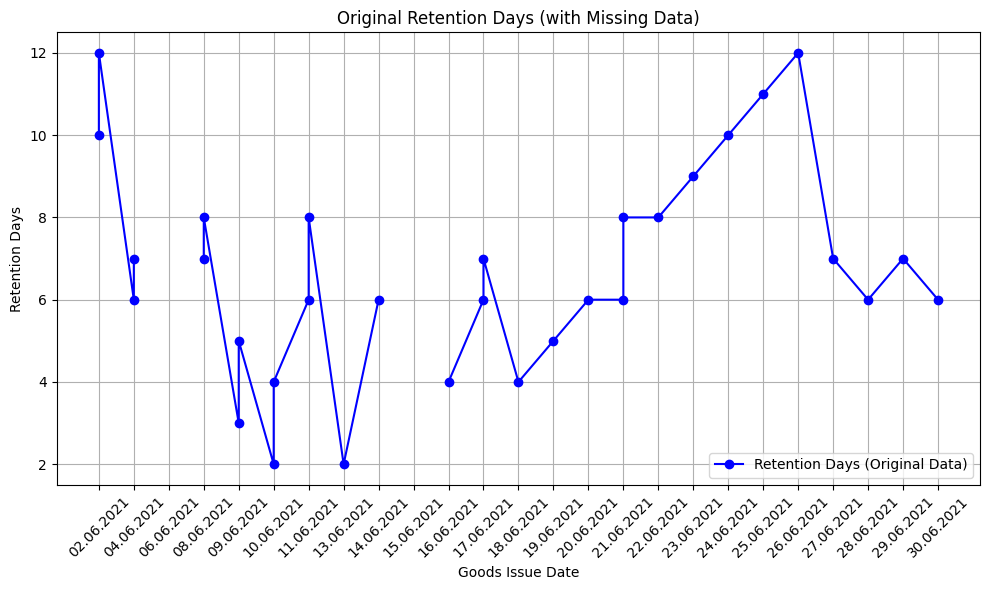

In [21]:
# Convert to DataFrame
df = pd.DataFrame(data)

# Replace '?' with NaN for forecasting
df['Retention Days'] = pd.to_numeric(df['Retention Days'], errors='coerce')

# Plot 1: Original Retention Days data (with NaN values)
plt.figure(figsize=(10, 6))
plt.plot(df['Goods Issue'], df['Retention Days'], marker='o', label='Retention Days (Original Data)', linestyle='-', color='b')
plt.title('Original Retention Days (with Missing Data)')
plt.xlabel('Goods Issue Date')
plt.ylabel('Retention Days')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [27]:
df.isna().sum()

Material Code              0
Location Partner           0
Exchange Partner           0
Container Serial Number    0
Goods Issue                0
Goods Receipt              0
Retention Days             2
dtype: int64

In [30]:
# Croston’s method implementation (same as before)
def croston_method(ts, alpha=0.1, smoothing_level=0.1):
    # Split the data into demand (non-zero) values and periods between events
    demand = ts[ts > 0].values
    periods = ts.index[ts > 0].difference(ts.index[ts == 0]).values

    # Calculate smoothed demand and periods using exponential smoothing (Holt-Winters)
    demand_smoothed = ExponentialSmoothing(demand, trend=None, seasonal=None).fit(smoothing_level).fittedvalues
    period_smoothed = ExponentialSmoothing(periods, trend=None, seasonal=None).fit(smoothing_level).fittedvalues

    # Plot 2: Smoothed Demand and Periods
    plt.figure(figsize=(10, 6))
    plt.plot(demand_smoothed, label='Smoothed Demand', linestyle='-', color='g')
    plt.plot(period_smoothed, label='Smoothed Periods', linestyle='--', color='r')
    plt.title('Smoothed Demand and Periods (Holt-Winters)')
    plt.xlabel('Period')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Calculate the forecast
    forecast = demand_smoothed / period_smoothed
    return forecast

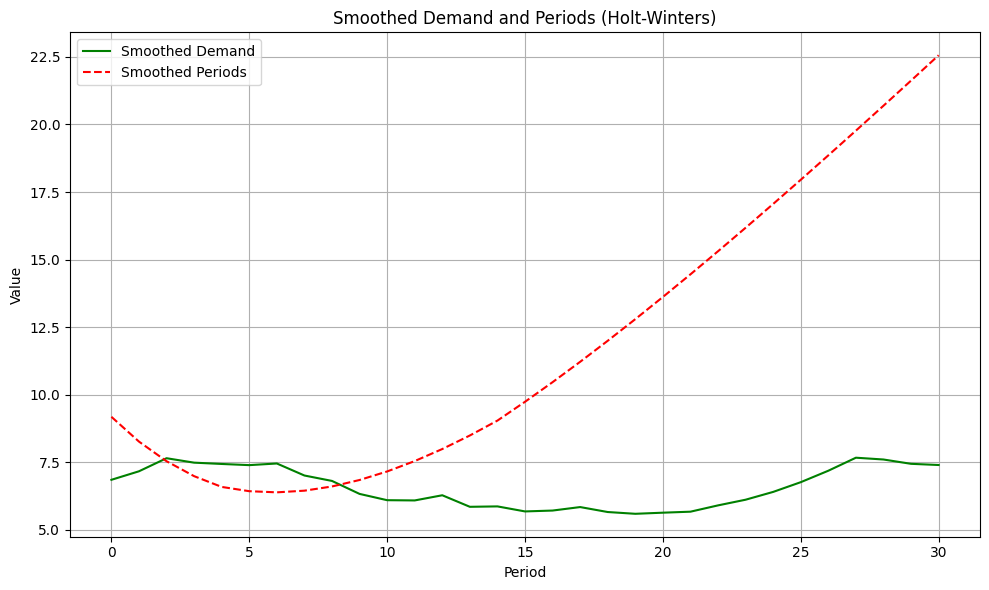

In [31]:
# Apply Croston's method on the Retention Days
retention_days_series = df['Retention Days'].dropna()
forecasted_values = croston_method(retention_days_series)

In [32]:
forecasted_values

array([0.74591936, 0.86696443, 1.01471055, 1.07158161, 1.12907726,
       1.1501601 , 1.1673792 , 1.08712894, 1.03111303, 0.92467957,
       0.85135907, 0.80673331, 0.78568738, 0.68891285, 0.64858974,
       0.58307963, 0.54568212, 0.52051777, 0.4714106 , 0.43680022,
       0.4134965 , 0.39206971, 0.38542226, 0.37769457, 0.37510152,
       0.3764793 , 0.38090737, 0.38765713, 0.36715936, 0.34397036,
       0.32773555])

In [33]:
# Replace missing values ('?') with the forecasted Retention Days
df.loc[df['Retention Days'].isna(), 'Retention Days'] = forecasted_values[:df['Retention Days'].isna().sum()]




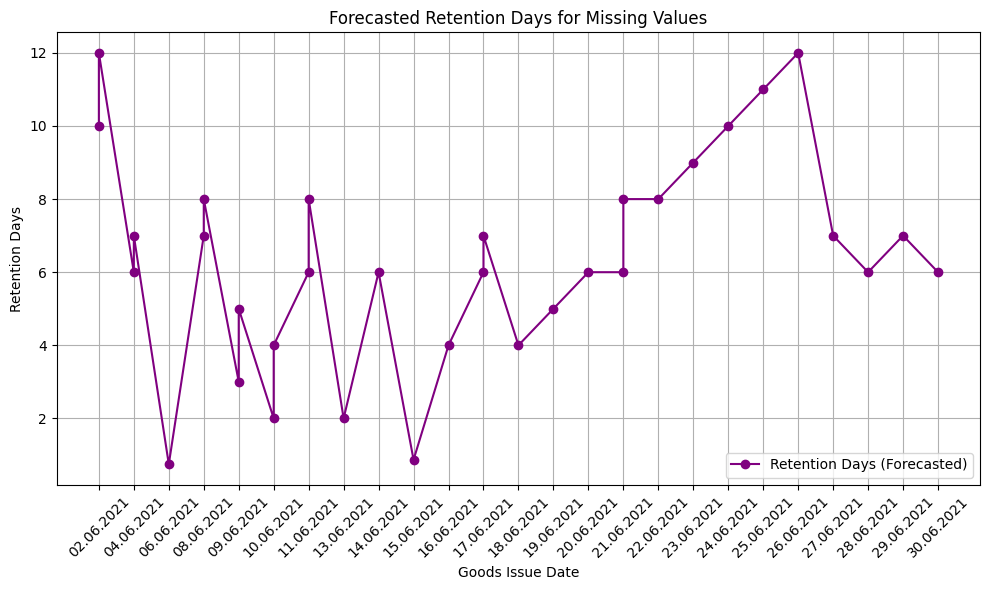

       Material Code  Location Partner  Exchange Partner  \
0   MAT_CHEMICAL_001              3030            250458   
1   MAT_CHEMICAL_001              3030            250458   
2   MAT_CHEMICAL_002              1710            400123   
3   MAT_CHEMICAL_002              1710            400123   
4   MAT_CHEMICAL_001              3030            340023   
5   MAT_CHEMICAL_003              4040            500678   
6   MAT_CHEMICAL_003              4040            500678   
7   MAT_CHEMICAL_001              3030            250458   
8   MAT_CHEMICAL_001              3030            250458   
9   MAT_CHEMICAL_002              1710            400123   
10  MAT_CHEMICAL_002              1710            400123   
11  MAT_CHEMICAL_003              4040            500678   
12  MAT_CHEMICAL_003              4040            500678   
13  MAT_CHEMICAL_002              1710            400123   
14  MAT_CHEMICAL_003              4040            500678   
15  MAT_CHEMICAL_002              1710  

In [34]:
# Plot 3: Forecasted Retention Days
plt.figure(figsize=(10, 6))
plt.plot(df['Goods Issue'], df['Retention Days'], marker='o', label='Retention Days (Forecasted)', linestyle='-', color='purple')
plt.title('Forecasted Retention Days for Missing Values')
plt.xlabel('Goods Issue Date')
plt.ylabel('Retention Days')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Output the updated dataframe with forecasted values
print(df)